<a href="https://colab.research.google.com/github/Nesby77/ML-M2RESI/blob/main/Titanic_Prediction_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastapi uvicorn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Installer et configurer le token ngrok

In [ ]:
!pip install pyngrok
!ngrok authtoken 2KEmulzOzABtZxb1pHULmIVC21k_5F4nAYQBQjgHvAz2FgcRx


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


Chargement des données


In [ ]:
import pandas as pd
import joblib
# Charger le dataset Titanic
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_data = pd.read_csv(url)

# Afficher les premières lignes du dataset
print(titanic_data.head())


   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


Exploration et Préparation des données

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Charger le dataset Titanic
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_data = pd.read_csv(url)

# Analyse des données
print(titanic_data.info())
print(titanic_data.describe())

# Traitement des valeurs manquantes pour 'Age' (si elles existent)
if 'Age' in titanic_data.columns:
    titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Traitement des valeurs manquantes pour 'Embarked' (si elle existe)
if 'Embarked' in titanic_data.columns:
    titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Encodage des variables catégorielles (si elles existent)
if 'Sex' in titanic_data.columns:
    titanic_data = pd.get_dummies(titanic_data, columns=['Sex'], drop_first=True)
if 'Embarked' in titanic_data.columns:
    titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Suppression des colonnes inutiles (si elles existent)
columns_to_drop = ['Name', 'Ticket', 'Cabin']
for column in columns_to_drop:
    if column in titanic_data.columns:
        titanic_data.drop(column, axis=1, inplace=True)

# Afficher les premières lignes du DataFrame nettoyé
print(titanic_data.head())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min     

Modélisation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Séparation des caractéristiques et de la cible
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement de différents modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.2f}")

    # Enregistrer le modèle
joblib.dump(model, 'titanic_model.pkl')



Logistic Regression Accuracy: 0.75
Random Forest Accuracy: 0.79
Support Vector Machine Accuracy: 0.65


['titanic_model.pkl']

Évaluation des modèles

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       111
           1       0.71      0.73      0.72        67

    accuracy                           0.79       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.79      0.79       178



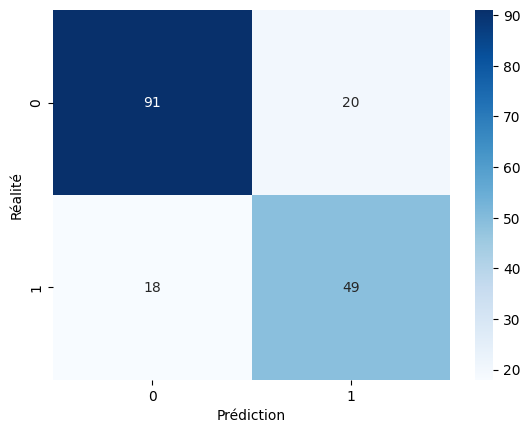

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Sélection du meilleur modèle (par exemple, Random Forest)
best_model = models['Random Forest']
y_pred = best_model.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.show()


Déploiement

In [ ]:
import joblib

# Enregistrer le modèle
joblib.dump(best_model, 'titanic_model.pkl')


['titanic_model.pkl']

Créer une API avec FastAPI

In [ ]:
from fastapi import FastAPI
import joblib
import pandas as pd

app = FastAPI()

# Charger le modèle
model = joblib.load('titanic_model.pkl')

@app.post("/predict")
def predict(data: dict):
    df = pd.DataFrame([data])
    prediction = model.predict(df)
    return {"prediction": int(prediction[0])}


Utilisation de ngrok

Mise à jour du schéma de la requête

In [ ]:
from pydantic import BaseModel

class Passenger(BaseModel):
    Pclass: int
    Sex_male: int
    Age: float
    Siblings_Spouses_Aboard: int
    Parents_Children_Aboard: int
    Fare: float

@app.post("/predict")
def predict(data: Passenger):
    df = pd.DataFrame([data.dict()])
    prediction = model.predict(df)
    return {"prediction": int(prediction[0])}


In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok

# Importer les modules nécessaires
import nest_asyncio
from pyngrok import ngrok
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

# Appliquer nest_asyncio pour éviter les erreurs liées aux boucles d'événements
nest_asyncio.apply()

# Créer une instance FastAPI
app = FastAPI()

# Charger le modèle
model = joblib.load('titanic_model.pkl')

# Classe Pydantic pour le schéma de la requête
class Passenger(BaseModel):
    Pclass: int
    Sex_male: int
    Age: float
    Siblings_Spouses_Aboard: int
    Parents_Children_Aboard: int
    Fare: float

# Route de base pour vérifier le bon fonctionnement
@app.get("/")
def read_root():
    return {"message": "Welcome to the Titanic prediction API!"}

# Route pour les prédictions
@app.post("/predict")
def predict(data: Passenger):
    df = pd.DataFrame([data.dict()])
    prediction = model.predict(df)
    return {"prediction": int(prediction[0])}

# Configurer et démarrer ngrok
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)

# Démarrer le serveur Uvicorn
uvicorn.run(app, host='0.0.0.0', port=8000)


Public URL: https://6c09-34-150-141-6.ngrok-free.app


INFO:     Started server process [282]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     41.83.92.18:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     41.83.92.18:0 - "GET /docs HTTP/1.1" 200 OK
